# Suriname's Economic Outlook

#### In this file:
1) Distributions of:

    1.1) the monthly appreciations of the crude oil vs usd
    
    1.2) the monthly appreciations of gold vs usd
    
2) The Forecasts using the ARIMA model:
    
    2.1) Bactesting and predicting the value of the next month for Oil
        
    2.2) Bactesting and predicting the value of the next month for Gold
    

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Importing files

#Monthly Data
Data = pd.read_excel("./group_work.xlsx", sheet_name = "Monthly Data") #importing file
Data["Timestamp"] = pd.to_datetime(Data["Timestamp"]) #setting timestamp to date format
Data.set_index("Timestamp", inplace = True) #setting date as index

#Yearly Data
Data_yearly = pd.read_excel("./group_work.xlsx", sheet_name = "Yearly Data")
Data["Timestamp"] = pd.to_datetime(Data_yearly["Timestamp"]) #setting timestamp to date format
Data_yearly.set_index("Timestamp", inplace = True) #setting date as index

# 1) Distributions

### 1.1) Crude Oil Monthly appreciations vs USD

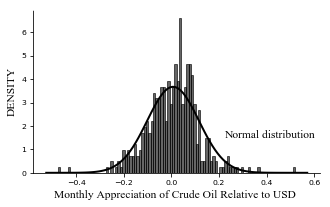

In [26]:
# Histogram
fig, ax = plt.subplots()
plt.hist(Data["Oil % Change"].dropna(), bins=100, density=True, alpha=0.6, color="k", edgecolor = "k")
## Consistent with np.histogram.

csfont = {'fontname':'Times New Roman','size': 11.5} #setting font to Times New Roman, size 10


# Normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x,
                   Data["Oil % Change"].dropna().mean(),
                   Data["Oil % Change"].dropna().std())
plt.plot(x, p, 'k', linewidth=2)

# Other definitions
plt.xlabel('{} '.format("Monthly Appreciation of Crude Oil Relative to USD"), **csfont)
plt.ylabel('DENSITY', **csfont)
plt.annotate('Normal distribution', xy=(0.22,1.5), **csfont)
plt.tight_layout()

ax.tick_params(axis='both', which='major', labelsize=7.8)
ax.tick_params(axis='both', which='minor', labelsize=7.8)

ax.spines["top"].set_color("w")
ax.spines["right"].set_color("w")

fig.set_size_inches(5.9/1.3,3.64/1.3)
plt.savefig("./oil_allperiods.png", dpi=500)

### Gold monthly appreciations vs USD

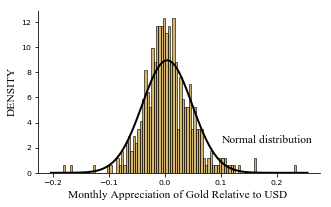

In [28]:
# Histogram
fig, ax = plt.subplots()
plt.hist(Data["Gold % Change"].dropna(), bins=100, density=True, alpha=0.6, color="darkgoldenrod", edgecolor = "k")
## Consistent with np.histogram.

csfont = {'fontname':'Times New Roman','size': 11.5} #setting font to Times New Roman, size 10


# Normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x,
                   Data["Gold % Change"].dropna().mean(),
                   Data["Gold % Change"].dropna().std())
plt.plot(x, p, 'k', linewidth=2)

# Other definitions
plt.xlabel('{} '.format("Monthly Appreciation of Gold Relative to USD"), **csfont)
plt.ylabel('DENSITY', **csfont)
plt.annotate('Normal distribution', xy=(0.1,2.4), **csfont)
plt.tight_layout()

ax.tick_params(axis='both', which='major', labelsize=7.8)
ax.tick_params(axis='both', which='minor', labelsize=7.8)

ax.spines["top"].set_color("w")
ax.spines["right"].set_color("w")

fig.set_size_inches(5.9/1.3,3.64/1.3)
plt.savefig("./gold_allperiods.png", dpi=500)

# 2) ARIMA model predictions

### 2.1) Bactesting and prediction of next month Crude Oil

C:\Users\jlbgo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\jlbgo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\jlbgo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=73.540133, expected=77.120000
predicted=77.927285, expected=74.840000
predicted=74.451739, expected=79.880000
predicted=81.170928, expected=85.310000
predicted=86.721639, expected=77.330000
predicted=75.701639, expected=76.730000
predicted=76.737149, expected=75.290000
predicted=75.107502, expected=74.690000
predicted=74.690561, expected=78.950000
predicted=80.030984, expected=83.080000
predicted=84.151106, expected=84.750000
predicted=85.279068, expected=92.010000
predicted=93.813149, expected=98.810000
predicted=100.566186, expected=102.800000
predicted=103.928017, expected=110.890000
predicted=113.026015, expected=124.070000
predicted=127.630257, expected=113.270000
predicted=111.107070, expected=114.710000
predicted=115.252038, expected=118.530000
predicted=119.594615, expected=109.840000
predicted=108.234782, expected=115.100000
predicted=116.389461, expected=114.200000
predicted=114.254692, expected=112.320000
predicted=112.173665, expected=104.950000
predicted=103.6727

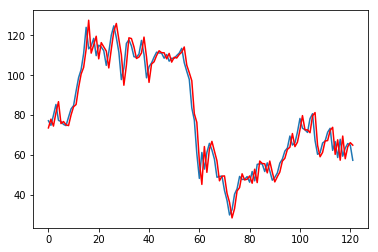

In [5]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

oil_monthly = Data["Oil Spot"].iloc[:-1]

X = oil_monthly.values
# Split data for training: 288 months to train, and predict the months from 2010 onwards
size = int(288)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# Predictions loop for each next date
predictions = list()
for t in range(len(test)):
  # ARIMA hyperparameter configurations
	model = ARIMA(history, order=(1,1,0))
  # Train the model
	model_fit = model.fit(disp=0)
  # Forecast
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# Error calculation by using MSE
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# Plot the result
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [6]:
# ARIMA hyperparameter configurations
model = ARIMA(Data["Oil Spot"], order=(1,1,0))
# Train the model
model_fit = model.fit(disp=0)
# Forecast
output = model_fit.forecast()
next_prediction = output[0]

print('next prediction: =%f' % next_prediction)

next prediction: =25.232613


C:\Users\jlbgo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jlbgo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Summing up oil monthly prediction:

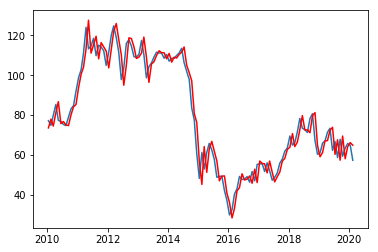

Test RMSE: 6.114
Futures RMSE: 11.560
next prediction: =25.232613


In [7]:
oil_monthly_results = pd.DataFrame(test)
oil_monthly_results.columns = ["oil_monthly_actual"]
oil_monthly_results["oil_monthly_prediction"] = pd.DataFrame(predictions)
oil_monthly_results.set_index(oil_monthly.iloc[288:,].index, inplace = True)


pyplot.plot(oil_monthly_results["oil_monthly_actual"])
pyplot.plot(oil_monthly_results["oil_monthly_prediction"], color='red')
pyplot.show()

error_futures = mean_squared_error(list(Data.loc["2010-02-16":,"Oil Spot"]), list(Data.loc["2010-01-16":"2020-02-16","Oil Future"]))

print('Test RMSE: %.3f' % error**0.5)

print('Futures RMSE: %.3f' % error_futures**0.5)

print('next prediction: =%f' % next_prediction)

### 2.2) Bactesting and predicting next month for Gold

predicted=1126.953192, expected=1133.150000
predicted=1134.931317, expected=1116.900000
predicted=1122.582917, expected=1126.250000
predicted=1127.814760, expected=1136.050000
predicted=1137.572403, expected=1222.150000
predicted=1211.918292, expected=1233.100000
predicted=1234.896960, expected=1192.650000
predicted=1202.039502, expected=1224.470000
predicted=1222.895382, expected=1274.470000
predicted=1270.593425, expected=1372.900000
predicted=1364.489230, expected=1341.750000
predicted=1349.698762, expected=1366.600000
predicted=1367.016044, expected=1359.450000
predicted=1364.240992, expected=1371.720000
predicted=1373.852099, expected=1400.280000
predicted=1400.272991, expected=1483.880000
predicted=1477.390064, expected=1501.740000
predicted=1503.826857, expected=1528.340000
predicted=1529.508819, expected=1589.570000
predicted=1587.250468, expected=1777.050000
predicted=1770.414567, expected=1795.600000
predicted=1799.656987, expected=1671.800000
predicted=1682.484739, expected=

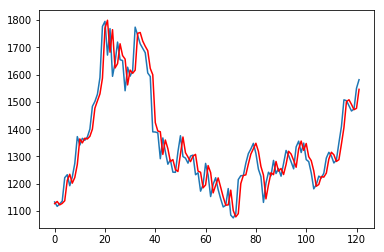

In [8]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

gold_monthly = Data["Gold Spot"].iloc[:-1]

X = gold_monthly.values
# Split data for training: 288 months to train, and predict the months from 2010 onwards
size = int(288)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# Predictions loop for each next date
predictions = list()
for t in range(len(test)):
  # ARIMA hyperparameter configurations
	model = ARIMA(history, order=(1,1,0))
  # Train the model
	model_fit = model.fit(disp=0)
  # Forecast
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# Error calculation by using MSE
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# Plot the result
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [9]:
# ARIMA hyperparameter configurations
model = ARIMA(Data["Gold Spot"], order=(1,1,0))
# Train the model
model_fit = model.fit(disp=0)
# Forecast
output = model_fit.forecast()
next_prediction = output[0]

print('next prediction: =%f' % next_prediction)

next prediction: =1513.035142


C:\Users\jlbgo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\jlbgo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Summing up gold prediction

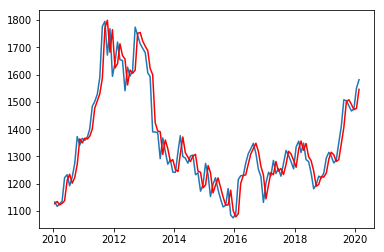

Test RMSE: 58.994
Futures RMSE: 73.364
next prediction: =1513.035142


In [10]:
gold_monthly_results = pd.DataFrame(test)
gold_monthly_results.columns = ["gold_monthly_actual"]
gold_monthly_results["gold_monthly_prediction"] = pd.DataFrame(predictions)
gold_monthly_results.set_index(oil_monthly.iloc[288:,].index, inplace = True)


pyplot.plot(gold_monthly_results["gold_monthly_actual"])
pyplot.plot(gold_monthly_results["gold_monthly_prediction"], color='red')
pyplot.show()

error_futures = mean_squared_error(list(Data.loc["2010-02-16":,"Gold Spot"]), list(Data.loc["2010-01-16":"2020-02-16","Gold Future"]))

print('Test RMSE: %.3f' % error**0.5)


print('Futures RMSE: %.3f' % error_futures**0.5)

print('next prediction: =%f' % next_prediction)

In [11]:
gold_monthly_results.to_excel("./goldresults.xlsx")

In [13]:
a=(-3+2.5)**2+(0.5)**2+1**2
(a/4)

0.375